In [1]:
import pandas as pd
import gurobipy as gp
from gurobipy import GRB
import os
import numpy as np
os.chdir("C:/Users/mihir/OneDrive/Desktop/MDI/Gurobi_Workspace/Cracking_the_vault_2025_GDDA")

In [ ]:
hexagon_model = gp.Model("hexagon")

In [3]:
number_of_vertices = 6
x = hexagon_model.addVars(range(number_of_vertices), lb=0, ub=1, name="x", vtype=GRB.CONTINUOUS)
y = hexagon_model.addVars(range(number_of_vertices), lb=-0.5, ub=0.5, name="x", vtype=GRB.CONTINUOUS)
hexagon_model.addConstr(x[0] == 0)
hexagon_model.addConstr(y[0] == 0)
hexagon_model.addConstr(y[number_of_vertices/2] == 0)
hexagon_model.update()

In [4]:
obj = 0.5 * gp.quicksum((x[i]*y[(i+1)%number_of_vertices] - x[(i+1)%number_of_vertices]*y[i]) for i in range(number_of_vertices))
hexagon_model.setObjective(obj, GRB.MAXIMIZE)

In [5]:
for i in range(number_of_vertices):
    for j in range(i+1,number_of_vertices):
        hexagon_model.addConstr((x[j]-x[i])**2 + (y[j] - y[i])**2 <= 1, name = f"edge_limit_{i+1}_{j+1}")

In [6]:
def orientation(x, y, i, j, k):
    return (y[j]-y[i])*(x[k]-x[j])-(x[j]-x[i])*(y[k]-y[j])

In [7]:
for i in range(number_of_vertices-1):
    j = i + 1
    for k in range(j+1, number_of_vertices):
        l = (k + 1)%number_of_vertices
        if not (i == 0 and l == 0):
            tmp1 = hexagon_model.addVar(lb=0.001)
            tmp2 = hexagon_model.addVar(lb=0.001)
            hexagon_model.addConstr(orientation(x,y,i,j,k)*orientation(x,y,i,j,l) == tmp1)
            hexagon_model.addConstr(orientation(x,y,k,l,i)*orientation(x,y,j,k,i) == tmp2)

In [8]:
hexagon_model.write("hexagon.lp")
hexagon_model.optimize()

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-12700H, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 3 rows, 30 columns and 3 nonzeros
Model fingerprint: 0x01d8c575
Model has 12 quadratic objective terms
Model has 15 quadratic constraints
Model has 18 general nonlinear constraints (306 nonlinear terms)
Variable types: 30 continuous, 0 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 2e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e-03, 1e+00]
  RHS range        [0e+00, 0e+00]
  QRHS range       [1e+00, 1e+00]
Presolve model has 18 nlconstr
Added 52 variables to disaggregate expressions.
Presolve removed 3 rows and 3 columns
Presolve time: 0.03s
Presolved: 173 rows, 81 columns, 475 nonzeros
Presolved model has 14 quadratic 

In [9]:
x_coords = [x[i].X for i in range(number_of_vertices)]
y_coords = [y[i].X for i in range(number_of_vertices)]
x_coords.append(x[0].X)
y_coords.append(y[0].X)
display(x_coords)
display(y_coords)

[0.0,
 0.060946731895509754,
 0.5976494948822896,
 1.0,
 0.597649131432264,
 0.060946621206586206,
 0.0]

[0.0, -0.34377162665829575, -0.5, 0.0, 0.5, 0.34377132509213887, 0.0]

In [10]:
import matplotlib.pyplot as plt

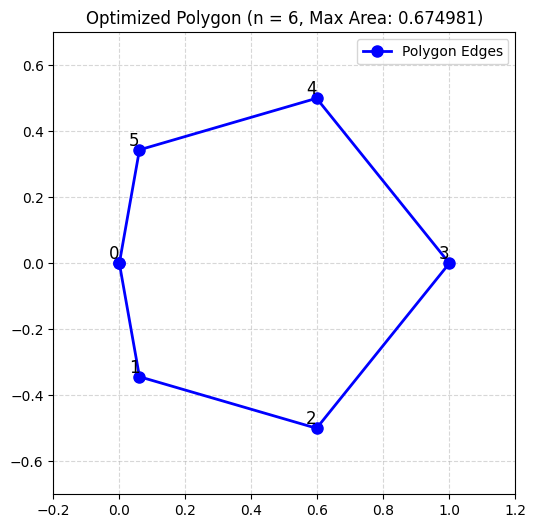

In [11]:
# plt.scatter(x_coords, y_coords)
plt.figure(figsize=(6,6))
plt.plot(x_coords, y_coords, 'bo-', linewidth=2, markersize=8, label="Polygon Edges")
# Label vertices
for i in range(number_of_vertices):
    plt.text(x_coords[i], y_coords[i], f'{i}', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
# Plot styling
plt.xlim(min(x_coords)-0.2, max(x_coords)+0.2)
plt.ylim(min(y_coords)-0.2, max(y_coords)+0.2)
plt.gca().set_aspect('equal') # Ensure aspect ratio is equal
plt.grid(True, linestyle="--", alpha=0.5)
plt.title(f"Optimized Polygon (n = {number_of_vertices}, Max Area: {hexagon_model.objVal:.6f})")
plt.legend()
plt.show()